# Библиотека pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов.

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

## Series

**Создание объекта Series из 5 элементов, индексированных буквами:**

In [ ]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [ ]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [ ]:
salaries['Andrew'], salaries.Andrew

(400, 400)

**Series поддерживает пропуски в данных.**

In [ ]:
salaries['Carl'] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [ ]:
salaries['Carl']

nan

In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [ ]:
# Заменяем все Nan на 150
salaries.fillna(150, inplace=True)


In [ ]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       150.0
dtype: float64

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [ ]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[0:3], '\n')
print(len(salaries[salaries > 0]), 'Положительных значение\n')

Второй элемент серии 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

5 Положительных значение



## DataFrame

### Создание и изменение

**Перейдём к рассмотрению объектов типа DataFrame. Такой объект можно создать из массива numpy, указав названия строк и столбцов.**

In [ ]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,-0.009428,0.754007,-0.195838
o2,-1.399469,1.487428,-2.672753
o3,-0.610614,-2.090998,-1.040717
o4,0.157633,0.258258,0.771543
o5,-0.956857,1.127183,-0.245095


**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [ ]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.614644,a,False
1,0.192968,b,False
2,0.652515,c,False
3,0.585806,d,True
4,0.864391,e,True


In [ ]:
type(df2)

pandas.core.frame.DataFrame

**Обращение к элементам (или целым кускам фрейма):**

In [ ]:
print('Элемент на 3 позиции в столбце B = ', df2.at[3, 'B'], '\n')
print(df2.loc[2:4, 'B':'C'])



Элемент на 3 позиции в столбце B =  d 

   B      C
2  c  False
3  d   True
4  e   True


**Изменение элементов и добавление новых:**

In [ ]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.621768,a,False
1,0.823462,b,False
2,0.111339,f,False
3,0.442967,d,True
4,0.467516,e,True


In [ ]:
df2.loc[4]

A    0.864391
B           e
C        True
Name: 4, dtype: object

In [ ]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.621768,a,False
1,0.823462,b,False
2,0.111339,f,False
3,0.442967,d,True
4,0.467516,e,True
5,3.141500,c,False


In [ ]:
df2.iloc[2,1]
# loc - работает с именами столбцов
# iloc - работает с индексами столбцов

'c'

In [ ]:
df2.columns

Index(['A', 'B', 'C'], dtype='object')

#### Обработка пропущенных значений

In [ ]:
df1

,f1,f2,f3
o1,-0.009428,0.754007,-0.195838
o2,-1.399469,1.487428,-2.672753
o3,-0.610614,-2.090998,-1.040717
o4,0.157633,0.258258,0.771543
o5,-0.956857,1.127183,-0.245095


In [ ]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,f1,f2,f3,A,C
o1,-0.009428,0.754007,-0.195838,NaN,NaN
o2,-1.399469,1.487428,-2.672753,NaN,NaN
o3,-0.610614,-2.090998,-1.040717,NaN,NaN
o4,0.157633,0.258258,0.771543,NaN,NaN
o5,-0.956857,1.127183,-0.245095,NaN,NaN


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [ ]:
pd.isnull(df1)

,f1,f2,f3,A,C
o1,False,False,False,True,True
o2,False,False,False,True,True
o3,False,False,False,True,True
o4,False,False,False,True,True
o5,False,False,False,True,True


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [ ]:
df1

,f1,f2,f3,A,C
o1,-0.009428,0.754007,-0.195838,NaN,NaN
o2,-1.399469,1.487428,-2.672753,NaN,NaN
o3,-0.610614,-2.090998,-1.040717,NaN,NaN
o4,0.157633,0.258258,0.771543,NaN,NaN
o5,-0.956857,1.127183,-0.245095,NaN,NaN


In [ ]:
df1.dropna(how='any',axis=1)

,f1,f2,f3
o1,-0.009428,0.754007,-0.195838
o2,-1.399469,1.487428,-2.672753
o3,-0.610614,-2.090998,-1.040717
o4,0.157633,0.258258,0.771543
o5,-0.956857,1.127183,-0.245095


In [ ]:
df1

,f1,f2,f3,A,C
o1,-0.009428,0.754007,-0.195838,NaN,NaN
o2,-1.399469,1.487428,-2.672753,NaN,NaN
o3,-0.610614,-2.090998,-1.040717,NaN,NaN
o4,0.157633,0.258258,0.771543,NaN,NaN
o5,-0.956857,1.127183,-0.245095,NaN,NaN


In [ ]:
df1.shape

(5, 5)

In [ ]:
df1.shape[0]*[0]

[0, 0, 0, 0, 0]

In [ ]:
df1['D'] = df1.shape[0]*[np.nan]

In [ ]:
df1

,f1,f2,f3,A,C,D
o1,-0.009428,0.754007,-0.195838,NaN,NaN,NaN
o2,-1.399469,1.487428,-2.672753,NaN,NaN,NaN
o3,-0.610614,-2.090998,-1.040717,NaN,NaN,NaN
o4,0.157633,0.258258,0.771543,NaN,NaN,NaN
o5,-0.956857,1.127183,-0.245095,NaN,NaN,NaN


In [ ]:
df1.dropna(how='all', axis=1)

,f1,f2,f3
o1,-0.009428,0.754007,-0.195838
o2,-1.399469,1.487428,-2.672753
o3,-0.610614,-2.090998,-1.040717
o4,0.157633,0.258258,0.771543
o5,-0.956857,1.127183,-0.245095


**Пропуски можно заменить каким-то значением.**

In [ ]:
df1.fillna(0)

,f1,f2,f3,A,C,D
o1,-0.009428,0.754007,-0.195838,0.0,0.0,0.0
o2,-1.399469,1.487428,-2.672753,0.0,0.0,0.0
o3,-0.610614,-2.090998,-1.040717,0.0,0.0,0.0
o4,0.157633,0.258258,0.771543,0.0,0.0,0.0
o5,-0.956857,1.127183,-0.245095,0.0,0.0,0.0


## Пример первичного анализа данных с Pandas

In [ ]:
import os
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [ ]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv'

In [ ]:
pass_data = pd.read_csv(url, sep='\t')
#если делаете без интернета воспользуйтесь следующей строчкой
#pass_data = pd.read_csv('data/titanik.csv')

In [ ]:
#сохраним файлы локально
pass_data.to_csv('data/titanik.csv')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [ ]:
pass_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
pass_data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


Посмотрим на признаки:

In [ ]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [ ]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [ ]:
pass_data = pass_data.rename(str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [ ]:
pass_data[2:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [ ]:
pass_data.iloc[1:5, 1:3]

,survived,pclass
1,1,1
2,1,3
3,1,1
4,0,3


In [ ]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [ ]:
pass_data[['name', 'sex', 'pclass']].head()

,name,sex,pclass
0,"Braund, Mr. Owen Harris",male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,3


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [ ]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
pass_data.shape

(156, 12)

In [ ]:
pass_data[pass_data['sex']=='female'].sort_values(['age'], ascending=False)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [ ]:
# TASK: Посмотрим, сколько на борту было относительно молодых женщин,
# путешествующих в одиночку. Скорее всего, довольно мало,
# потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.
# Ваш код здесь
# 

Кроме того, для заданного признака можно построить гистограмму:

<AxesSubplot:>

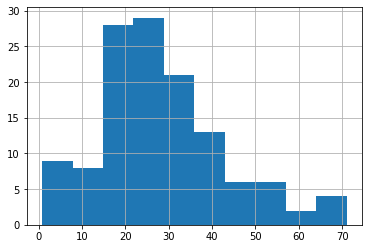

In [ ]:
pass_data.age.hist()